종목 이름을 입력하세요 : 넷마블일봉
투자 금액을 입력하세요 : 1000000



C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


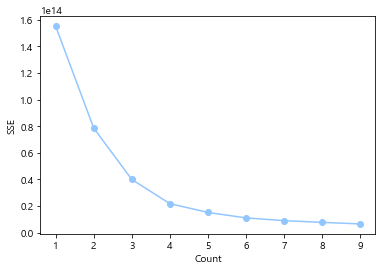


 매수 날짜:20210629 시가:132500 
 자금:72361, 보유 주식:7
 
클러스터 :  1

 매도 날짜:20210630 시가:136000 
 자금:1021838, 보유 주식:0
	이득 
클러스터 :  1

 매수 날짜:20210701 시가:136500 
 자금:66195, 보유 주식:7
 
클러스터 :  3

 매도 날짜:20210714 시가:136000 
 자금:1015672, 보유 주식:0
	손해 
클러스터 :  1

 매수 날짜:20210720 시가:136500 
 자금:60029, 보유 주식:7
 
클러스터 :  3

 매도 날짜:20210802 시가:138000 
 자금:1023469, 보유 주식:0
	이득 
클러스터 :  1

 매수 날짜:20210901 시가:127500 
 자금:3316, 보유 주식:8
 
클러스터 :  1

 매도 날짜:20210903 시가:125500 
 자금:1004655, 보유 주식:0
	손해 
클러스터 :  1

 매수 날짜:20211008 시가:121000 
 자금:36510, 보유 주식:8
 
클러스터 :  1

 매도 날짜:20211101 시가:123500 
 자금:1021892, 보유 주식:0
	이득 
클러스터 :  1

 매수 날짜:20211102 시가:127500 
 자금:1739, 보유 주식:8
 
클러스터 :  1

 매도 날짜:20211103 시가:126000 
 자금:1007068, 보유 주식:0
	손해 
클러스터 :  1

 매수 날짜:20211109 시가:125500 
 자금:2917, 보유 주식:8
 
클러스터 :  3

 매도 날짜:20211124 시가:121500 
 자금:972341, 보유 주식:0
	손해 
클러스터 :  1

 매수 날짜:20211209 시가:122000 
 자금:118213, 보유 주식:7
 
클러스터 :  3

 매도 날짜:20211216 시가:119000 
 자금:949006, 보유 주식:0
	손해 
클러스터 :  1

 매수 날짜:20211220 시가:

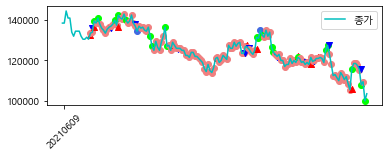

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from typing import Sized
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.cluster import KMeans
import seaborn as sns

commission = 0.00015
tax = 0.0025
songtemp=0

sell_count = 0
buy_count = 0



writejusicname=input("종목 이름을 입력하세요 : ")
jusicroad="C:/Users/82106/Desktop/승규/JUSIK/JUSIK/주식데이터들/"
jusicroad2=".csv"
jusicname=jusicroad+writejusicname+jusicroad2
initial_funds = int(input("투자 금액을 입력하세요 : "))
df = pd.read_csv(jusicname, header=None,
                 names=['날짜', '시가', '고가', '저가', '종가', '거래량'], encoding="CP949")
df['날짜']=df['날짜'].astype(str)
print()

# k-means clustering
dftest = pd.read_csv(jusicname, header=None,
                 names=['날짜', '시가', '고가', '저가', '종가', '거래량'], encoding="CP949")
dftest['날짜']=dftest['날짜'].astype(str)
#jn=dftest.fillna(dftest.mean())
#print(jn)
def findk(n):
    sse=[]
    for i in range(1,10):
        km = KMeans(n_clusters=i, init='k-means++',random_state=1)
        km.fit(n)
        sse.append(km.inertia_)
    plt.plot(range(1,10),sse,marker='o')
    plt.xlabel('Count')
    plt.ylabel('SSE')
    plt.show()
findk(dftest)
model=KMeans(n_clusters=4,random_state=1)
model.fit(dftest)
#print(model.labels_)
dftest['Cluss']=model.labels_
dftest.to_csv("C:/Users/82106/Desktop/승규/JUSIK/JUSIK/주식데이터들/testtest넷마블.csv",encoding="CP949")
cluster = pd.read_csv("C:/Users/82106/Desktop/승규/JUSIK/JUSIK/주식데이터들/testtest넷마블.csv",encoding="CP949")

'''
sector = cluster.groupby('Cluss').cluster.sum
print(sector)
'''

class Data:
    def __init__(self):
        self.data=0
        self.close=0
        self.price=0

        # 볼린저밴드
        self.mbb=0
        self.ubb=0
        self.lbb=0
        self.bw=0
        self.mean_bw=0
        
        # RSI
        self.ursi=0         # U
        self.drsi=0         # D
        self.a_ursi=0       # AU
        self.a_drsi=0       # AD
        self.rs=0           # RS
        self.rsi=0          # RSI

        self.setData()


    def setData(self):
        self.data = pd.read_csv("C:/Users/82106/Desktop/승규/JUSIK/JUSIK/주식데이터들/test넷마블test.csv", header=None,
        names=['날짜', '시가', '고가', '저가', '종가', '거래량','Cluss'], encoding="UTF-8")
        
        #self.data=self.data[self.data['Cluss']==0]
        #self.data=self.data[self.data['Cluss']==1]
        #self.data=self.data[self.data['Cluss']==2]
        #self.data=self.data[self.data['Cluss']==3]
        
        self.data0=self.data[self.data['Cluss']==0]
        self.data1=self.data[self.data['Cluss']==1]
        self.data2=self.data[self.data['Cluss']==2]
        self.data3=self.data[self.data['Cluss']==3]

        self.data['날짜']=self.data['날짜'].astype(str)
        
        self.data = self.data.reset_index(drop=True)
        self.price=self.data['시가']
        self.close=self.data.loc[:, '종가'].astype(int)
        self.close.index=self.data.loc[:, '날짜']
        self.clus=self.data.loc[:,'Cluss']

        ##

        self.close0=self.data0.loc[:, '종가'].astype(int)
        self.close0.index=self.data0.loc[:, '날짜']
        self.close1=self.data1.loc[:, '종가'].astype(int)
        self.close1.index=self.data1.loc[:, '날짜']
        self.close2=self.data2.loc[:, '종가'].astype(int)
        self.close2.index=self.data2.loc[:, '날짜']
        self.close3=self.data3.loc[:, '종가'].astype(int)
        self.close3.index=self.data3.loc[:, '날짜']

        self.RSI()  


    def RSI(self, w=9):
        # 기본설정
        self.ursi=self.close.diff(1).dropna()

        self.drsi=self.close.diff(1).dropna()

        self.ursi[self.ursi<0]=0
        self.drsi[self.drsi>0]=0
        
        self.a_ursi=self.ursi.rolling(window=w).mean()
        self.a_drsi=abs(self.drsi.rolling(window=w).mean())

        self.rs=self.a_ursi/self.a_drsi
        self.rsi=100.0-(100.0/(1.0+self.rs))



class Trade(Data):
    def __init__(self, inital_funds):
        super().__init__()
        self.funds=inital_funds
        self.stock_amount=0
        self.stock_price=0
        self.tempa=0
        self.tempb=0
        self.correct=0
        self.note=""

    # 수수료 포함 buy
    def buyStocks(self, stocks_price):
        amount_buy=self.funds//stocks_price
        self.note=""

        if amount_buy<=0:
            return False
        commission_buy=stocks_price*amount_buy*commission
        if self.funds-stocks_price*amount_buy-commission_buy<0:
            while amount_buy>0:
                amount_buy-=1
                commission_buy=stocks_price*amount_buy*commission
                if self.funds-stocks_price*amount_buy-commission_buy>=0:
                    break
        self.stock_amount+=amount_buy
        self.tempa=self.funds
        self.funds=round(self.funds-(stocks_price*amount_buy+commission_buy))

        self.stock_price=stocks_price
        return True


    # 수수료 포함 sell
    def sellStocks(self, stocks_price):
        if self.stock_amount==0:
            return False
        commission_sell=(stocks_price*self.stock_amount)*(commission+tax)
        self.funds=round(self.funds+stocks_price*self.stock_amount-commission_sell)
        self.tempb=self.funds
        

        if self.tempb-self.tempa>0:
            self.correct+=1
            #self.note=self.tempb-self.tempa,"이득"
            self.note="\t이득"
        else:
            #self.note=self.tempb-self.tempa,"손해"
            self.note="\t손해"


        self.stock_price=stocks_price
        self.stock_amount=0
        return True
        

    def show(self, sort, date, color):
        songtemp=0
        print(f'{color}{sort} 날짜:{date} 시가:{self.stock_price}{color}')
        print(f'{color}자금:{self.funds}, 보유 주식:{self.stock_amount}\n{self.note}{color}')
        #print(f'{color}{self.note}{color}')
        #print()


    # 종가, rsi 그래프 그리기
    def draw(self, sort , num): 
        plt.style.use('seaborn-pastel')
        plt.subplot(2,1,1)
        
        df=self.close
        df0=self.close0
        df0.index=df0.index.astype(str)
        df1=self.close1
        df1.index=df1.index.astype(str)
        df2=self.close2
        df2.index=df2.index.astype(str)
        df3=self.close3
        df3.index=df3.index.astype(str)
        
        if sort=='매수':
            songtemp=0
            #plt.scatter(self.data.index[num], self.data['종가'].iloc[num], color="r", marker='^')
            plt.scatter(self.data.index[num+1], self.data['시가'].iloc[num+1], color="r", marker='^')
        
        elif sort=='매도':
            songtemp=0
            #plt.scatter(self.data.index[num], self.data['종가'].iloc[num], color="b", marker='v')
            plt.scatter(self.data.index[num+1], self.data['시가'].iloc[num+1], color="b", marker='v')



        else: 
            songtemp=0
            
            df2=self.close
            df2.index=df2.index.astype(str)
            plt.rc('font', family='Malgun Gothic')
            plt.plot(df2.index, df2, color="c", label="종가")
            plt.xticks(np.arange(1, df.shape[0], 300), rotation=45)
            plt.legend()  
            plt.show()
            
            
            '''
            plt.scatter(self.data.index[num+1], df0, label="0")
            plt.xticks(np.arange(1, df.shape[0], 300), rotation=45)
            plt.legend()  
            plt.show()
            plt.scatter(df.index, df1, label="1")
            plt.xticks(np.arange(1, df.shape[0], 300), rotation=45)
            plt.legend()  
            plt.show()
            plt.scatter(df.index, df2, label="2")
            plt.xticks(np.arange(1, df.shape[0], 300), rotation=45)
            plt.legend()  
            plt.show()
            plt.scatter(df.index, df3, label="3")
            plt.xticks(np.arange(1, df.shape[0], 300), rotation=45)
            plt.legend()  
            plt.show()
            

            plt.subplot(2,1,2)
            plt.rc('font', family='Malgun Gothic')
            df2=self.rsi
            df2.index=df2.index.astype(str)
            plt.axhline(30, color='y', linestyle='--', linewidth=1)
            plt.axhline(70, color='y', linestyle='--', linewidth=1)
            plt.plot(df2.index, df2, label='RSI')
            plt.xticks(np.arange(0, df2.shape[0], 300), rotation=45)
            plt.legend()  
            plt.show() 
            '''


sell_count = 0
buy_count = 0

print()

trade = Trade(initial_funds)


for num in range(0,trade.rsi.shape[0]):
    
    ##넷마블##
    # cluss 0 :  -
    # cluss 1 : 박스
    # cluss 2 : -
    # cluss 3 : 급등급락
    
    ## 펄어비스 ##
    # cluss 0 : 박스
    # cluss 1 : -
    # cluss 2 : 상승
    # cluss 3 : -
    if (trade.clus[num]==1):
        songtemp=0
        plt.scatter(trade.data.index[num],trade.data['종가'].iloc[num], color='lightcoral')
        if num>0 and trade.rsi.iloc[num]>50 and trade.rsi.iloc[num]!=np.NaN:
            # rsi 값이 50상향 돌파 매수 시그널
            b=trade.buyStocks(trade.price[num+1])
            if b:
                trade.show('매수', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                buy_count+=1
                trade.draw('매수', num)
                
        if num>0 and trade.rsi.iloc[num]<50 and trade.rsi.iloc[num]!=np.NaN :
            # rsi 값이 50하향 돌파  매도 시그널
            b=trade.sellStocks(trade.price[num+1])
            if b:
                trade.show('매도', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                sell_count += 1
                trade.draw('매도', num)

    elif (trade.clus[num]==0):
        songtemp=0
        plt.scatter(trade.data.index[num], trade.data['종가'].iloc[num], color='royalblue')
    elif (trade.clus[num]==3):
        songtemp=0
        #상승
        plt.scatter(trade.data.index[num], trade.data['종가'].iloc[num], color='lime')
        if num>0 and trade.rsi.iloc[num-1]<=30 and trade.rsi.iloc[num]>30 and trade.rsi.iloc[num]!=np.NaN :
        #if num>0 and trade.rsi.iloc[num]>70 and trade.rsi.iloc[num]!=np.NaN:
            # rsi 값이 50상향 돌파 매수 시그널
            b=trade.buyStocks(trade.price[num+1])
            if b:
                trade.show('매수', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                buy_count+=1
                trade.draw('매수', num)
        elif num>0 and trade.rsi.iloc[num-1]>=70 and trade.rsi.iloc[num]<70 and trade.rsi.iloc[num]!=np.NaN :        
        #elif num>0 and trade.rsi.iloc[num]<70 and trade.rsi.iloc[num]!=np.NaN :
            # rsi 값이 50하향 돌파  매도 시그널
            b=trade.sellStocks(trade.price[num+1])
            if b:
                trade.show('매도', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                sell_count += 1
                trade.draw('매도', num)
    elif (trade.clus[num]==2):
        songtemp=0
        plt.scatter(trade.data.index[num], trade.data['종가'].iloc[num], color='tan')
'''
    if num>0 and trade.rsi.iloc[num]>50 and trade.rsi.iloc[num]!=np.NaN :
        # rsi 값이 50상향 돌파 매수 시그널
        b=trade.buyStocks(trade.price[num+1])
        if b:
            trade.show('매수', trade.data['날짜'][num+1], '\0')
            print("클러스터 : ",trade.data['Cluss'][num+1])
            print()
            buy_count+=1
            trade.draw('매수', num)

            
    
    # elif num>0 and trade.rsi.iloc[num-1]>=70 and trade.rsi.iloc[num]<70 and trade.rsi.iloc[num]!=np.NaN :
        # rsi 값이 70기준 재 하향돌파 할때 과매수 구간 매도 시그널
    if num>0 and trade.rsi.iloc[num]<50 and trade.rsi.iloc[num]!=np.NaN :
        # rsi 값이 50하향 돌파  매도 시그널
        b=trade.sellStocks(trade.price[num+1])
        if b:
            trade.show('매도', trade.data['날짜'][num+1], '\0')
            print("클러스터 : ",trade.data['Cluss'][num+1])
            print()
            sell_count += 1
            trade.draw('매도', num)
            '''

#plt.legend()
#plt.show()
print(f'매도횟수:{sell_count}')
print(f'매수횟수:{sell_count}')
print(f'정확도: {sell_count} 중 {trade.correct} 번 수익 == > {(trade.correct/sell_count)*100}%')
print()
print(f'투자 금액={initial_funds}')
money=0
if trade.stock_amount!=0:
    money=trade.price.iloc[-1]*trade.stock_amount
#print(f'보유 주식 수:{trade.stock_amount}')
print(f'투자 후 금액={trade.funds+money}')
print(f'수익률={(trade.funds+money-initial_funds)/initial_funds*100}%')
#print(f'원숭이 금액={initial_funds-(initial_funds//trade.close.iloc[0])*trade.close.iloc[0]+trade.close.iloc[-1]*(initial_funds//trade.close.iloc[0])}')
monkeyukiki=initial_funds-(initial_funds//trade.close.iloc[0])*trade.close.iloc[0]+trade.close.iloc[-1]*(initial_funds//trade.close.iloc[0])
print(f'원숭이 수익률={(monkeyukiki-initial_funds)/initial_funds*100}%')
trade.draw(0, 0)

종목 이름을 입력하세요 : 넷마블일봉
투자 금액을 입력하세요 : 123456



C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


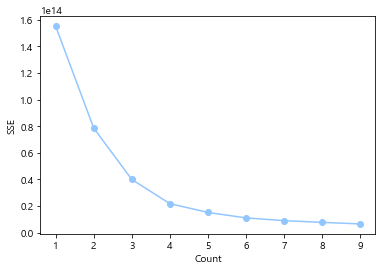

AttributeError: 'DataFrameGroupBy' object has no attribute 'cluster'

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from typing import Sized
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.cluster import KMeans
import seaborn as sns

commission = 0.00015
tax = 0.0025
songtemp=0

sell_count = 0
buy_count = 0



writejusicname=input("종목 이름을 입력하세요 : ")
jusicroad="C:/Users/82106/Desktop/승규/JUSIK/JUSIK/주식데이터들/"
jusicroad2=".csv"
jusicname=jusicroad+writejusicname+jusicroad2
initial_funds = int(input("투자 금액을 입력하세요 : "))
df = pd.read_csv(jusicname, header=None,
                 names=['날짜', '시가', '고가', '저가', '종가', '거래량'], encoding="CP949")
df['날짜']=df['날짜'].astype(str)
print()

# k-means clustering
dftest = pd.read_csv(jusicname, header=None,
                 names=['날짜', '시가', '고가', '저가', '종가', '거래량'], encoding="CP949")
dftest['날짜']=dftest['날짜'].astype(str)
#jn=dftest.fillna(dftest.mean())
#print(jn)
def findk(n):
    sse=[]
    for i in range(1,10):
        km = KMeans(n_clusters=i, init='k-means++',random_state=1)
        km.fit(n)
        sse.append(km.inertia_)
    plt.plot(range(1,10),sse,marker='o')
    plt.xlabel('Count')
    plt.ylabel('SSE')
    plt.show()
findk(dftest)
model=KMeans(n_clusters=4,random_state=1)
model.fit(dftest)
#print(model.labels_)
dftest['Cluss']=model.labels_
dftest.to_csv("C:/Users/82106/Desktop/승규/JUSIK/JUSIK/주식데이터들/testtest넷마블.csv",encoding="CP949")
cluster = pd.read_csv("C:/Users/82106/Desktop/승규/JUSIK/JUSIK/주식데이터들/testtest넷마블.csv",encoding="CP949")

'''
sector = cluster.groupby('Cluss').cluster.sum
print(sector)
'''

class Data:
    def __init__(self):
        self.data=0
        self.close=0
        self.price=0

        # 볼린저밴드
        self.mbb=0
        self.ubb=0
        self.lbb=0
        self.bw=0
        self.mean_bw=0
        
        # RSI
        self.ursi=0         # U
        self.drsi=0         # D
        self.a_ursi=0       # AU
        self.a_drsi=0       # AD
        self.rs=0           # RS
        self.rsi=0          # RSI

        self.setData()


    def setData(self):
        self.data = pd.read_csv("C:/Users/82106/Desktop/승규/JUSIK/JUSIK/주식데이터들/test넷마블train.csv", header=None,
        names=['날짜', '시가', '고가', '저가', '종가', '거래량','Cluss'], encoding="UTF-8")
        
        #self.data=self.data[self.data['Cluss']==0]
        #self.data=self.data[self.data['Cluss']==1]
        #self.data=self.data[self.data['Cluss']==2]
        #self.data=self.data[self.data['Cluss']==3]
        
        self.data0=self.data[self.data['Cluss']==0]
        self.data1=self.data[self.data['Cluss']==1]
        self.data2=self.data[self.data['Cluss']==2]
        self.data3=self.data[self.data['Cluss']==3]

        self.data['날짜']=self.data['날짜'].astype(str)
        
        self.data = self.data.reset_index(drop=True)
        self.price=self.data['시가']
        self.close=self.data.loc[:, '종가'].astype(int)
        self.close.index=self.data.loc[:, '날짜']
        self.clus=self.data.loc[:,'Cluss']

        ##

        self.close0=self.data0.loc[:, '종가'].astype(int)
        self.close0.index=self.data0.loc[:, '날짜']
        self.close1=self.data1.loc[:, '종가'].astype(int)
        self.close1.index=self.data1.loc[:, '날짜']
        self.close2=self.data2.loc[:, '종가'].astype(int)
        self.close2.index=self.data2.loc[:, '날짜']
        self.close3=self.data3.loc[:, '종가'].astype(int)
        self.close3.index=self.data3.loc[:, '날짜']

        self.RSI()  


    def RSI(self, w=9):
        # 기본설정
        self.ursi=self.close.diff(1).dropna()

        self.drsi=self.close.diff(1).dropna()

        self.ursi[self.ursi<0]=0
        self.drsi[self.drsi>0]=0
        
        self.a_ursi=self.ursi.rolling(window=w).mean()
        self.a_drsi=abs(self.drsi.rolling(window=w).mean())

        self.rs=self.a_ursi/self.a_drsi
        self.rsi=100.0-(100.0/(1.0+self.rs))



class Trade(Data):
    def __init__(self, inital_funds):
        super().__init__()
        self.funds=inital_funds
        self.stock_amount=0
        self.stock_price=0
        self.tempa=0
        self.tempb=0
        self.correct=0
        self.note=""

    # 수수료 포함 buy
    def buyStocks(self, stocks_price):
        amount_buy=self.funds//stocks_price
        self.note=""

        if amount_buy<=0:
            return False
        commission_buy=stocks_price*amount_buy*commission
        if self.funds-stocks_price*amount_buy-commission_buy<0:
            while amount_buy>0:
                amount_buy-=1
                commission_buy=stocks_price*amount_buy*commission
                if self.funds-stocks_price*amount_buy-commission_buy>=0:
                    break
        self.stock_amount+=amount_buy
        self.tempa=self.funds
        self.funds=round(self.funds-(stocks_price*amount_buy+commission_buy))

        self.stock_price=stocks_price
        return True


    # 수수료 포함 sell
    def sellStocks(self, stocks_price):
        if self.stock_amount==0:
            return False
        commission_sell=(stocks_price*self.stock_amount)*(commission+tax)
        self.funds=round(self.funds+stocks_price*self.stock_amount-commission_sell)
        self.tempb=self.funds
        

        if self.tempb-self.tempa>0:
            self.correct+=1
            #self.note=self.tempb-self.tempa,"이득"
            self.note="\t이득"
        else:
            #self.note=self.tempb-self.tempa,"손해"
            self.note="\t손해"


        self.stock_price=stocks_price
        self.stock_amount=0
        return True
        

    def show(self, sort, date, color):
        songtemp=0
        print(f'{color}{sort} 날짜:{date} 시가:{self.stock_price}{color}')
        print(f'{color}자금:{self.funds}, 보유 주식:{self.stock_amount}\n{self.note}{color}')
        #print(f'{color}{self.note}{color}')
        #print()


    # 종가, rsi 그래프 그리기
    def draw(self, sort , num): 
        plt.style.use('seaborn-pastel')
        plt.subplot(2,1,1)
        
        df=self.close
        df0=self.close0
        df0.index=df0.index.astype(str)
        df1=self.close1
        df1.index=df1.index.astype(str)
        df2=self.close2
        df2.index=df2.index.astype(str)
        df3=self.close3
        df3.index=df3.index.astype(str)
        
        #self.data=self.data[self.data['Cluss']==0]
        if (self.clus[num]==0):
            plt.scatter(self.data.index[num],self.data['종가'].iloc[num], color='lightcoral')
        elif (self.clus[num]==1):
            plt.scatter(self.data.index[num], self.data['종가'].iloc[num], color='tan')
        elif (self.clus[num]==2):
            plt.scatter(self.data.index[num], self.data['종가'].iloc[num], color='lime')
        elif (self.clus[num]==3):
            plt.scatter(self.data.index[num], self.data['종가'].iloc[num], color='royalblue')
            
        if sort=='매수':
            songtemp=0
            #plt.scatter(self.data.index[num], self.data['종가'].iloc[num], color="r", marker='^')
            plt.scatter(self.data.index[num+1], self.data['시가'].iloc[num+1], color="r", marker='^')
        
        elif sort=='매도':
            songtemp=0
            #plt.scatter(self.data.index[num], self.data['종가'].iloc[num], color="b", marker='v')
            plt.scatter(self.data.index[num+1], self.data['시가'].iloc[num+1], color="b", marker='v')



        else: 
            songtemp=0
            
            df2=self.close
            df2.index=df2.index.astype(str)
            plt.rc('font', family='Malgun Gothic')
            plt.plot(df2.index, df2, color="c", label="종가")
            plt.xticks(np.arange(1, df.shape[0], 300), rotation=45)
            plt.legend()  
            plt.show()
            
            
            
            
            '''
            plt.scatter(self.data.index[num+1], df0, label="0")
            plt.xticks(np.arange(1, df.shape[0], 300), rotation=45)
            plt.legend()  
            plt.show()
            plt.scatter(df.index, df1, label="1")
            plt.xticks(np.arange(1, df.shape[0], 300), rotation=45)
            plt.legend()  
            plt.show()
            plt.scatter(df.index, df2, label="2")
            plt.xticks(np.arange(1, df.shape[0], 300), rotation=45)
            plt.legend()  
            plt.show()
            plt.scatter(df.index, df3, label="3")
            plt.xticks(np.arange(1, df.shape[0], 300), rotation=45)
            plt.legend()  
            plt.show()
            

            plt.subplot(2,1,2)
            plt.rc('font', family='Malgun Gothic')
            df2=self.rsi
            df2.index=df2.index.astype(str)
            plt.axhline(30, color='y', linestyle='--', linewidth=1)
            plt.axhline(70, color='y', linestyle='--', linewidth=1)
            plt.plot(df2.index, df2, label='RSI')
            plt.xticks(np.arange(0, df2.shape[0], 300), rotation=45)
            plt.legend()  
            plt.show() 
            '''

    # rsi만 그리고 매도 매수 표시
    # def draw(self, sort , num):
    #     plt.style.use('seaborn-pastel')
    #     if sort=='매수':
    #         plt.plot(self.data.index[num], self.rsi.iloc[num], color="r", marker='^')
        
    #     elif sort=='매도':
    #         plt.plot(self.data.index[num], self.rsi.iloc[num], color="b", marker='v')
    #     else: 
    #         plt.rc('font', family='Malgun Gothic')

    #         df=self.rsi
    #         df.index=df.index.astype(str)
    #         plt.axhline(30, color='y', linestyle='--', linewidth=1)
    #         plt.axhline(70, color='y', linestyle='--', linewidth=1)
    #         plt.plot(df.index, df, label='RSI')
    #         plt.xticks(np.arange(0, df.shape[0], 50), rotation=45)
    #         plt.legend()  
    #         plt.show()
             

sell_count = 0
buy_count = 0

print()

trade = Trade(initial_funds)


for num in range(0,trade.rsi.shape[0]):
    
    ##넷마블##
    # cluss 0 :  -
    # cluss 1 : 박스
    # cluss 2 : -
    # cluss 3 : 급등급락
    
    ## 펄어비스 ##
    # cluss 0 : 박스
    # cluss 1 : -
    # cluss 2 : 상승
    # cluss 3 : -
    if (trade.clus[num]==1):
        songtemp=0
        plt.scatter(trade.data.index[num],trade.data['종가'].iloc[num], color='lightcoral')
       
        if num>0 and trade.rsi.iloc[num]>50 and trade.rsi.iloc[num]!=np.NaN:
            # rsi 값이 50상향 돌파 매수 시그널
            b=trade.buyStocks(trade.price[num+1])
            if b:
                trade.show('매수', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                buy_count+=1
                trade.draw('매수', num)
                
        if num>0 and trade.rsi.iloc[num]<50 and trade.rsi.iloc[num]!=np.NaN :
            # rsi 값이 50하향 돌파  매도 시그널
            b=trade.sellStocks(trade.price[num+1])
            if b:
                trade.show('매도', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                sell_count += 1
                trade.draw('매도', num)

    elif (trade.clus[num]==0):
        songtemp=0
        plt.scatter(trade.data.index[num], trade.data['종가'].iloc[num], color='royalblue')
    elif (trade.clus[num]==3):
        songtemp=0
        #상승
        plt.scatter(trade.data.index[num], trade.data['종가'].iloc[num], color='lime')
        #if num>0 and trade.rsi.iloc[num-1]<=30 and trade.rsi.iloc[num]>30 and trade.rsi.iloc[num]!=np.NaN :
        if num>0 and trade.rsi.iloc[num]>70 and trade.rsi.iloc[num]!=np.NaN:
        # rsi 값이 50상향 돌파 매수 시그널
            b=trade.buyStocks(trade.price[num+1])
            if b:
                trade.show('매수', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                buy_count+=1
                trade.draw('매수', num)
                
        #elif num>0 and trade.rsi.iloc[num-1]>=70 and trade.rsi.iloc[num]<70 and trade.rsi.iloc[num]!=np.NaN :        
        elif num>0 and trade.rsi.iloc[num]<70 and trade.rsi.iloc[num]!=np.NaN :
            # rsi 값이 50하향 돌파  매도 시그널
            b=trade.sellStocks(trade.price[num+1])
            if b:
                trade.show('매도', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                sell_count += 1
                trade.draw('매도', num)
    elif (trade.clus[num]==2):
        songtemp=0
        plt.scatter(trade.data.index[num], trade.data['종가'].iloc[num], color='tan')


#plt.legend()
#plt.show()
print(f'매도횟수:{sell_count}')
print(f'매수횟수:{sell_count}')
print(f'정확도: {sell_count} 중 {trade.correct} 번 수익 == > {(trade.correct/sell_count)*100}%')
print()
print(f'투자 금액={initial_funds}')
money=0
if trade.stock_amount!=0:
    money=trade.price.iloc[-1]*trade.stock_amount
#print(f'보유 주식 수:{trade.stock_amount}')
print(f'투자 후 금액={trade.funds+money}')
print(f'수익률={(trade.funds+money-initial_funds)/initial_funds*100}%')
#print(f'원숭이 금액={initial_funds-(initial_funds//trade.close.iloc[0])*trade.close.iloc[0]+trade.close.iloc[-1]*(initial_funds//trade.close.iloc[0])}')
monkeyukiki=initial_funds-(initial_funds//trade.close.iloc[0])*trade.close.iloc[0]+trade.close.iloc[-1]*(initial_funds//trade.close.iloc[0])
print(f'원숭이 수익률={(monkeyukiki-initial_funds)/initial_funds*100}%')
trade.draw(0, 0)

종목 이름을 입력하세요 : 넷마블일봉
투자 금액을 입력하세요 : 123456


 매수 날짜:20211019 시가:121500 
 자금:1938, 보유 주식:1
 
클러스터 :  1

 매도 날짜:20211021 시가:125500 
 자금:127105, 보유 주식:0
	이득 
클러스터 :  1

 매수 날짜:20211230 시가:118500 
 자금:8587, 보유 주식:1
 
클러스터 :  3

 매도 날짜:20220104 시가:127500 
 자금:135749, 보유 주식:0
	이득 
클러스터 :  1

매도횟수:2
매수횟수:2
정확도: 2 중 2 번 수익 == > 100.0%

투자 금액=123456
투자 후 금액=135749
수익률=9.957393727319856%
원숭이 수익률=0.0%


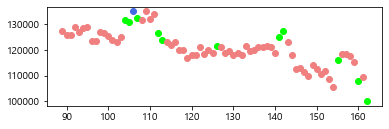

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from typing import Sized
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.cluster import KMeans
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

from sklearn.mixture import GaussianMixture

commission = 0.00015
tax = 0.0025
songtemp=0

sell_count = 0
buy_count = 0



writejusicname=input("종목 이름을 입력하세요 : ")
jusicroad="C:/Users/82106/Desktop/승규/JUSIK/JUSIK/주식데이터들/"
jusicroad2=".csv"
jusicname=jusicroad+writejusicname+jusicroad2
initial_funds = int(input("투자 금액을 입력하세요 : "))
df = pd.read_csv(jusicname, header=None,
                 names=['날짜', '시가', '고가', '저가', '종가', '거래량'], encoding="CP949")
df['날짜']=df['날짜'].astype(str)
print()

# k-means clustering
dftest = pd.read_csv(jusicname, header=None,
                 names=['날짜', '시가', '고가', '저가', '종가', '거래량'], encoding="CP949")
dftest['날짜']=dftest['날짜'].astype(str)
#jn=dftest.fillna(dftest.mean())
#print(jn)
'''
def findk(n):
    sse=[]
    for i in range(1,10):
        km = KMeans(n_clusters=i, init='k-means++',random_state=1)
        km.fit(n)
        sse.append(km.inertia_)
    plt.plot(range(1,10),sse,marker='o')
    plt.xlabel('Count')
    plt.ylabel('SSE')
    plt.show()
findk(dftest)
model=KMeans(n_clusters=4,random_state=1)
'''

#model = DBSCAN(eps=0.6, min_samples=8)

from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=4, random_state=42)
model_labels=model.fit_predict(dftest)

#print(model.labels_)
#dftest['Cluss']=model.labels_
dftest['Cluss']=model_labels
dftest.to_csv("C:/Users/82106/Desktop/승규/JUSIK/JUSIK/주식데이터들/testtest넷마블.csv",encoding="CP949")
cluster = pd.read_csv("C:/Users/82106/Desktop/승규/JUSIK/JUSIK/주식데이터들/testtest넷마블.csv",encoding="CP949")

class Data:
    def __init__(self):
        self.data=0
        self.close=0
        self.price=0

        # 볼린저밴드
        self.mbb=0
        self.ubb=0
        self.lbb=0
        self.bw=0
        self.mean_bw=0
        
        # RSI
        self.ursi=0         # U
        self.drsi=0         # D
        self.a_ursi=0       # AU
        self.a_drsi=0       # AD
        self.rs=0           # RS
        self.rsi=0          # RSI

        self.setData()


    def setData(self):
        self.data = pd.read_csv("C:/Users/82106/Desktop/승규/JUSIK/JUSIK/주식데이터들/test넷마블test.csv", header=None,
        names=['날짜', '시가', '고가', '저가', '종가', '거래량','Cluss'], encoding="UTF-8")
        
        #self.data=self.data[self.data['Cluss']==0]
        #self.data=self.data[self.data['Cluss']==1]
        #self.data=self.data[self.data['Cluss']==2]
        #self.data=self.data[self.data['Cluss']==3]
        
        self.data0=self.data[self.data['Cluss']==0]
        self.data1=self.data[self.data['Cluss']==1]
        self.data2=self.data[self.data['Cluss']==2]
        self.data3=self.data[self.data['Cluss']==3]

        self.data['날짜']=self.data['날짜'].astype(str)
        
        self.data = self.data.reset_index(drop=True)
        self.price=self.data['시가']
        self.close=self.data.loc[:, '종가'].astype(int)
        self.close.index=self.data.loc[:, '날짜']
        self.clus=self.data.loc[:,'Cluss']

        ##

        self.close0=self.data0.loc[:, '종가'].astype(int)
        self.close0.index=self.data0.loc[:, '날짜']
        self.close1=self.data1.loc[:, '종가'].astype(int)
        self.close1.index=self.data1.loc[:, '날짜']
        self.close2=self.data2.loc[:, '종가'].astype(int)
        self.close2.index=self.data2.loc[:, '날짜']
        self.close3=self.data3.loc[:, '종가'].astype(int)
        self.close3.index=self.data3.loc[:, '날짜']

        self.RSI()  


    def RSI(self, w=9):
        # 기본설정
        self.ursi=self.close.diff(1).dropna()

        self.drsi=self.close.diff(1).dropna()

        self.ursi[self.ursi<0]=0
        self.drsi[self.drsi>0]=0
        
        self.a_ursi=self.ursi.rolling(window=w).mean()
        self.a_drsi=abs(self.drsi.rolling(window=w).mean())

        self.rs=self.a_ursi/self.a_drsi
        self.rsi=100.0-(100.0/(1.0+self.rs))



class Trade(Data):
    def __init__(self, inital_funds):
        super().__init__()
        self.funds=inital_funds
        self.stock_amount=0
        self.stock_price=0
        self.tempa=0
        self.tempb=0
        self.correct=0
        self.note=""

    # 수수료 포함 buy
    def buyStocks(self, stocks_price):
        amount_buy=self.funds//stocks_price
        self.note=""

        if amount_buy<=0:
            return False
        commission_buy=stocks_price*amount_buy*commission
        if self.funds-stocks_price*amount_buy-commission_buy<0:
            while amount_buy>0:
                amount_buy-=1
                commission_buy=stocks_price*amount_buy*commission
                if self.funds-stocks_price*amount_buy-commission_buy>=0:
                    break
        self.stock_amount+=amount_buy
        self.tempa=self.funds
        self.funds=round(self.funds-(stocks_price*amount_buy+commission_buy))

        self.stock_price=stocks_price
        return True


    # 수수료 포함 sell
    def sellStocks(self, stocks_price):
        if self.stock_amount==0:
            return False
        commission_sell=(stocks_price*self.stock_amount)*(commission+tax)
        self.funds=round(self.funds+stocks_price*self.stock_amount-commission_sell)
        self.tempb=self.funds
        

        if self.tempb-self.tempa>0:
            self.correct+=1
            #self.note=self.tempb-self.tempa,"이득"
            self.note="\t이득"
        else:
            #self.note=self.tempb-self.tempa,"손해"
            self.note="\t손해"


        self.stock_price=stocks_price
        self.stock_amount=0
        return True
        

    def show(self, sort, date, color):
        songtemp=0
        print(f'{color}{sort} 날짜:{date} 시가:{self.stock_price}{color}')
        print(f'{color}자금:{self.funds}, 보유 주식:{self.stock_amount}\n{self.note}{color}')
        #print(f'{color}{self.note}{color}')
        #print()


    # 종가, rsi 그래프 그리기
    def draw(self, sort , num): 
        plt.style.use('seaborn-pastel')
        plt.subplot(2,1,1)
        
        df=self.close
        df0=self.close0
        df0.index=df0.index.astype(str)
        df1=self.close1
        df1.index=df1.index.astype(str)
        df2=self.close2
        df2.index=df2.index.astype(str)
        df3=self.close3
        df3.index=df3.index.astype(str)
        
        #self.data=self.data[self.data['Cluss']==0]
        '''
        if (self.clus[num]==0):
            plt.scatter(self.data.index[num],self.data['종가'].iloc[num], color='lightcoral')
        elif (self.clus[num]==1):
            plt.scatter(self.data.index[num], self.data['종가'].iloc[num], color='tan')
        elif (self.clus[num]==2):
            plt.scatter(self.data.index[num], self.data['종가'].iloc[num], color='lime')
        elif (self.clus[num]==3):
            plt.scatter(self.data.index[num], self.data['종가'].iloc[num], color='royalblue')
            '''
            
        if sort=='매수':
            songtemp=0
            #plt.scatter(self.data.index[num], self.data['종가'].iloc[num], color="r", marker='^')
            ##plt.scatter(self.data.index[num+1], self.data['시가'].iloc[num+1], color="r", marker='^')
        
        elif sort=='매도':
            songtemp=0
            #plt.scatter(self.data.index[num], self.data['종가'].iloc[num], color="b", marker='v')
            ##plt.scatter(self.data.index[num+1], self.data['시가'].iloc[num+1], color="b", marker='v')



        else: 
            songtemp=0
            '''
            df2=self.close
            df2.index=df2.index.astype(str)
            plt.rc('font', family='Malgun Gothic')
            plt.plot(df2.index, df2, color="c", label="종가")
            plt.xticks(np.arange(1, df.shape[0], 300), rotation=45)
            plt.legend()  
            plt.show()
            '''
            

sell_count = 0
buy_count = 0

print()

trade = Trade(initial_funds)


for num in range(0,trade.rsi.shape[0]):
    
    ##넷마블##
    # cluss 0 :  -
    # cluss 1 : 박스
    # cluss 2 : -
    # cluss 3 : 급등급락
    
    ## 펄어비스 ##
    # cluss 0 : 박스
    # cluss 1 : -
    # cluss 2 : 상승
    # cluss 3 : -
    if (trade.clus[num]==1):
        songtemp=0
        plt.scatter(trade.data.index[num],trade.data['종가'].iloc[num], color='lightcoral')
        #if num>0 and trade.rsi.iloc[num-1]<=30 and trade.rsi.iloc[num]>30 and trade.rsi.iloc[num]!=np.NaN :
        if num>0 and trade.rsi.iloc[num]>70 and trade.rsi.iloc[num]!=np.NaN:
            # rsi 값이 50상향 돌파 매수 시그널
            b=trade.buyStocks(trade.price[num+1])
            if b:
                trade.show('매수', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                buy_count+=1
                trade.draw('매수', num)
        #elif num>0 and trade.rsi.iloc[num-1]>=70 and trade.rsi.iloc[num]<70 and trade.rsi.iloc[num]!=np.NaN :    
        elif num>0 and trade.rsi.iloc[num]<70 and trade.rsi.iloc[num]!=np.NaN :
            # rsi 값이 50하향 돌파  매도 시그널
            b=trade.sellStocks(trade.price[num+1])
            if b:
                trade.show('매도', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                sell_count += 1
                trade.draw('매도', num)

    elif (trade.clus[num]==0):
        songtemp=0
        plt.scatter(trade.data.index[num], trade.data['종가'].iloc[num], color='royalblue')
        if num>0 and trade.rsi.iloc[num]>50 and trade.rsi.iloc[num]!=np.NaN:
            # rsi 값이 50상향 돌파 매수 시그널
            b=trade.buyStocks(trade.price[num+1])
            if b:
                trade.show('매수', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                buy_count+=1
                trade.draw('매수', num)
                
        if num>0 and trade.rsi.iloc[num]<50 and trade.rsi.iloc[num]!=np.NaN :
            # rsi 값이 50하향 돌파  매도 시그널
            b=trade.sellStocks(trade.price[num+1])
            if b:
                trade.show('매도', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                sell_count += 1
                trade.draw('매도', num)
                
    elif (trade.clus[num]==3):
        songtemp=0
        #상승
        plt.scatter(trade.data.index[num], trade.data['종가'].iloc[num], color='lime')
        #if num>0 and trade.rsi.iloc[num-1]<=30 and trade.rsi.iloc[num]>30 and trade.rsi.iloc[num]!=np.NaN :
        if num>0 and trade.rsi.iloc[num]>70 and trade.rsi.iloc[num]!=np.NaN:
        # rsi 값이 50상향 돌파 매수 시그널
            b=trade.buyStocks(trade.price[num+1])
            if b:
                trade.show('매수', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                buy_count+=1
                trade.draw('매수', num)
                
        #elif num>0 and trade.rsi.iloc[num-1]>=70 and trade.rsi.iloc[num]<70 and trade.rsi.iloc[num]!=np.NaN :        
        elif num>0 and trade.rsi.iloc[num]<70 and trade.rsi.iloc[num]!=np.NaN :
            # rsi 값이 50하향 돌파  매도 시그널
            b=trade.sellStocks(trade.price[num+1])
            if b:
                trade.show('매도', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                sell_count += 1
                trade.draw('매도', num)
    elif (trade.clus[num]==2):
        songtemp=0
        plt.scatter(trade.data.index[num], trade.data['종가'].iloc[num], color='tan')
        
        if num>0 and trade.rsi.iloc[num]>50 and trade.rsi.iloc[num]!=np.NaN:
            # rsi 값이 50상향 돌파 매수 시그널
            b=trade.buyStocks(trade.price[num+1])
            if b:
                trade.show('매수', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                buy_count+=1
                trade.draw('매수', num)
                
        if num>0 and trade.rsi.iloc[num]<50 and trade.rsi.iloc[num]!=np.NaN :
            # rsi 값이 50하향 돌파  매도 시그널
            b=trade.sellStocks(trade.price[num+1])
            if b:
                trade.show('매도', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                sell_count += 1
                trade.draw('매도', num)


#plt.legend()
#plt.show()
print(f'매도횟수:{sell_count}')
print(f'매수횟수:{sell_count}')
print(f'정확도: {sell_count} 중 {trade.correct} 번 수익 == > {(trade.correct/sell_count)*100}%')
print()
print(f'투자 금액={initial_funds}')
money=0
if trade.stock_amount!=0:
    money=trade.price.iloc[-1]*trade.stock_amount
#print(f'보유 주식 수:{trade.stock_amount}')
print(f'투자 후 금액={trade.funds+money}')
print(f'수익률={(trade.funds+money-initial_funds)/initial_funds*100}%')
#print(f'원숭이 금액={initial_funds-(initial_funds//trade.close.iloc[0])*trade.close.iloc[0]+trade.close.iloc[-1]*(initial_funds//trade.close.iloc[0])}')
monkeyukiki=initial_funds-(initial_funds//trade.close.iloc[0])*trade.close.iloc[0]+trade.close.iloc[-1]*(initial_funds//trade.close.iloc[0])
print(f'원숭이 수익률={(monkeyukiki-initial_funds)/initial_funds*100}%')
trade.draw(0, 0)


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from typing import Sized
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.cluster import KMeans
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

from sklearn.mixture import GaussianMixture

songtemp=0

writejusicname=input("종목 이름을 입력하세요 : ")
jusicroad="C:/Users/82106/Desktop/승규/JUSIK/JUSIK/주식데이터들/클러스터링에쓸거/"
jusicroad2=".csv"
jusicname=jusicroad+writejusicname+jusicroad2
df = pd.read_csv(jusicname, header=None,
                 names=['날짜', '시가', '고가', '저가', '종가', '거래량'], encoding="CP949")
df['날짜']=df['날짜'].astype(str)
print()

# k-means clustering
dftest = pd.read_csv(jusicname, header=None,
                 names=['날짜', '시가', '고가', '저가', '종가', '거래량'], encoding="CP949")
dftest['날짜']=dftest['날짜'].astype(str)
#jn=dftest.fillna(dftest.mean())
#print(jn)
'''
def findk(n):
    sse=[]
    for i in range(1,10):
        km = KMeans(n_clusters=i, init='k-means++',random_state=1)
        km.fit(n)
        sse.append(km.inertia_)
    plt.plot(range(1,10),sse,marker='o')
    plt.xlabel('Count')
    plt.ylabel('SSE')
    plt.show()
findk(dftest)
model=KMeans(n_clusters=4,random_state=1)
'''

#model = DBSCAN(eps=0.6, min_samples=8)

from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=4, random_state=42)
model_labels=model.fit_predict(dftest)

#print(model.labels_)
#dftest['Cluss']=model.labels_
dftest['Cluss']=model_labels
dftest.to_csv("C:/Users/82106/Desktop/승규/JUSIK/JUSIK/주식데이터들/클러스터링에쓸거/한국전력클러스터링.csv",encoding="CP949")
cluster = pd.read_csv("C:/Users/82106/Desktop/승규/JUSIK/JUSIK/주식데이터들/클러스터링에쓸거/한국전력클러스터링.csv",encoding="CP949")
print(cluster)

종목 이름을 입력하세요 : 한국전력

     Unnamed: 0        날짜     시가     고가     저가     종가      거래량  Cluss
0             0  20200319  17350  17700  15550  16250  4836755      2
1             1  20200320  16550  17550  16250  17300  3694677      2
2             2  20200323  16400  18100  16100  17300  3685846      2
3             3  20200324  17700  18650  17500  18650  3570950      2
4             4  20200325  19400  19650  18500  18800  4949884      2
..          ...       ...    ...    ...    ...    ...      ...    ...
495         495  20220323  23100  23200  22900  23100  1391015      1
496         496  20220324  23000  23450  22850  23050  1722081      1
497         497  20220325  23100  23100  22800  23050  1235465      1
498         498  20220328  22950  23350  22800  23200  1277510      1
499         499  20220329  23000  23000  22550  22650  2605904      1

[500 rows x 8 columns]


No handles with labels found to put in legend.



 매수 날짜:20200401 시가:47450 
 자금:3401, 보유 주식:21
 
클러스터 :  1

 매도 날짜:20200421 시가:49400 
 자금:1038052, 보유 주식:0
	이득 
클러스터 :  3

 매수 날짜:20200422 시가:48700 
 자금:15199, 보유 주식:21
 
클러스터 :  3

 매도 날짜:20200504 시가:48900 
 자금:1039378, 보유 주식:0
	이득 
클러스터 :  3

 매수 날짜:20200518 시가:47950 
 자금:32277, 보유 주식:21
 
클러스터 :  3

 매도 날짜:20200612 시가:52100 
 자금:1123478, 보유 주식:0
	이득 
클러스터 :  3

 매수 날짜:20200626 시가:52800 
 자금:14512, 보유 주식:21
 
클러스터 :  3

 매도 날짜:20200709 시가:53200 
 자금:1128751, 보유 주식:0
	이득 
클러스터 :  3

 매수 날짜:20200710 시가:53100 
 자금:13484, 보유 주식:21
 
클러스터 :  3

 매도 날짜:20200717 시가:54200 
 자금:1148668, 보유 주식:0
	이득 
클러스터 :  3

 매수 날짜:20200720 시가:54800 
 자금:52504, 보유 주식:20
 
클러스터 :  3

 매도 날짜:20200803 시가:57800 
 자금:1205441, 보유 주식:0
	이득 
클러스터 :  3

 매수 날짜:20200804 시가:57200 
 자금:4061, 보유 주식:21
 
클러스터 :  3

 매도 날짜:20200810 시가:57600 
 자금:1210456, 보유 주식:0
	이득 
클러스터 :  3

 매수 날짜:20200813 시가:59400 
 자금:22278, 보유 주식:20
 
클러스터 :  3

 매도 날짜:20200820 시가:57600 
 자금:1171225, 보유 주식:0
	손해 
클러스터 :  1

 매수 날짜:20200821 시가:56200 

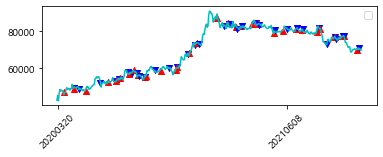

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from typing import Sized
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.cluster import KMeans
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

from sklearn.mixture import GaussianMixture

commission = 0.00015
tax = 0.0025
songtemp=0
initial_funds=1000000

sell_count = 0
buy_count = 0

class Data:
    def __init__(self):
        self.data=0
        self.close=0
        self.price=0

        # 볼린저밴드
        self.mbb=0
        self.ubb=0
        self.lbb=0
        self.bw=0
        self.mean_bw=0
        
        # RSI
        self.ursi=0         # U
        self.drsi=0         # D
        self.a_ursi=0       # AU
        self.a_drsi=0       # AD
        self.rs=0           # RS
        self.rsi=0          # RSI

        self.setData()


    def setData(self):
        self.data = pd.read_csv("D:\송승규\stg\클러스터링에쓸거\삼성전자트레이닝.csv"
                                , header=None,
        names=['날짜', '시가', '고가', '저가', '종가', '거래량','Cluss'], encoding="CP949")
   
        self.data0=self.data[self.data['Cluss']==0]
        self.data1=self.data[self.data['Cluss']==1]
        self.data2=self.data[self.data['Cluss']==2]
        self.data3=self.data[self.data['Cluss']==3]

        self.data['날짜']=self.data['날짜'].astype(str)
        
        self.data = self.data.reset_index(drop=True)
        self.price=self.data['시가']
        self.close=self.data.loc[:, '종가'].astype(int)
        self.close.index=self.data.loc[:, '날짜']
        self.clus=self.data.loc[:,'Cluss']

        ##

        self.close0=self.data0.loc[:, '종가'].astype(int)
        self.close0.index=self.data0.loc[:, '날짜']
        self.close1=self.data1.loc[:, '종가'].astype(int)
        self.close1.index=self.data1.loc[:, '날짜']
        self.close2=self.data2.loc[:, '종가'].astype(int)
        self.close2.index=self.data2.loc[:, '날짜']
        self.close3=self.data3.loc[:, '종가'].astype(int)
        self.close3.index=self.data3.loc[:, '날짜']

        self.RSI()  


    def RSI(self, w=9):
        # 기본설정
        self.ursi=self.close.diff(1).dropna()

        self.drsi=self.close.diff(1).dropna()

        self.ursi[self.ursi<0]=0
        self.drsi[self.drsi>0]=0
        
        self.a_ursi=self.ursi.rolling(window=w).mean()
        self.a_drsi=abs(self.drsi.rolling(window=w).mean())

        self.rs=self.a_ursi/self.a_drsi
        self.rsi=100.0-(100.0/(1.0+self.rs))



class Trade(Data):
    def __init__(self, inital_funds):
        super().__init__()
        self.funds=inital_funds
        self.stock_amount=0
        self.stock_price=0
        self.tempa=0
        self.tempb=0
        self.correct=0
        self.note=""

    # 수수료 포함 buy
    def buyStocks(self, stocks_price):
        amount_buy=self.funds//stocks_price
        self.note=""

        if amount_buy<=0:
            return False
        commission_buy=stocks_price*amount_buy*commission
        if self.funds-stocks_price*amount_buy-commission_buy<0:
            while amount_buy>0:
                amount_buy-=1
                commission_buy=stocks_price*amount_buy*commission
                if self.funds-stocks_price*amount_buy-commission_buy>=0:
                    break
        self.stock_amount+=amount_buy
        self.tempa=self.funds
        self.funds=round(self.funds-(stocks_price*amount_buy+commission_buy))

        self.stock_price=stocks_price
        return True


    # 수수료 포함 sell
    def sellStocks(self, stocks_price):
        if self.stock_amount==0:
            return False
        commission_sell=(stocks_price*self.stock_amount)*(commission+tax)
        self.funds=round(self.funds+stocks_price*self.stock_amount-commission_sell)
        self.tempb=self.funds
        

        if self.tempb-self.tempa>0:
            self.correct+=1
            #self.note=self.tempb-self.tempa,"이득"
            self.note="\t이득"
        else:
            #self.note=self.tempb-self.tempa,"손해"
            self.note="\t손해"


        self.stock_price=stocks_price
        self.stock_amount=0
        return True
        

    def show(self, sort, date, color):
        songtemp=0
        print(f'{color}{sort} 날짜:{date} 시가:{self.stock_price}{color}')
        print(f'{color}자금:{self.funds}, 보유 주식:{self.stock_amount}\n{self.note}{color}')
        #print(f'{color}{self.note}{color}')
        #print()


    # 종가, rsi 그래프 그리기
    def draw(self, sort , num): 
        plt.style.use('seaborn-pastel')
        plt.subplot(2,1,1)
        
        df=self.close
        df0=self.close0
        df0.index=df0.index.astype(str)
        df1=self.close1
        df1.index=df1.index.astype(str)
        df2=self.close2
        df2.index=df2.index.astype(str)
        df3=self.close3
        df3.index=df3.index.astype(str)

            
        if sort=='매수':
            songtemp=0
            #plt.scatter(self.data.index[num], self.data['종가'].iloc[num], color="r", marker='^')
            plt.scatter(self.data.index[num+1], self.data['시가'].iloc[num+1], color="r", marker='^')
        
        elif sort=='매도':
            songtemp=0
            #plt.scatter(self.data.index[num], self.data['종가'].iloc[num], color="b", marker='v')
            plt.scatter(self.data.index[num+1], self.data['시가'].iloc[num+1], color="b", marker='v')



        else: 
            songtemp=0
            df2=self.close
            df2.index=df2.index.astype(str)
            plt.rc('font', family='Malgun Gothic')
            plt.plot(df2.index, df2, color="c")
            plt.xticks(np.arange(1, df.shape[0], 300), rotation=45)
            plt.legend()  
            plt.show()
            

sell_count = 0
buy_count = 0

print()

trade = Trade(initial_funds)


for num in range(0,trade.rsi.shape[0]):
    if (trade.clus[num]==1):
        songtemp=0
        #plt.scatter(trade.data.index[num],trade.data['종가'].iloc[num], color='lightcoral')
        if num>0 and trade.rsi.iloc[num-1]<=30 and trade.rsi.iloc[num]>30 and trade.rsi.iloc[num]!=np.NaN :
            b=trade.buyStocks(trade.price[num+1])
            if b:
                trade.show('매수', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                buy_count+=1
                trade.draw('매수', num)
                
        elif num>0 and trade.rsi.iloc[num-1]>=70 and trade.rsi.iloc[num]<70 and trade.rsi.iloc[num]!=np.NaN :        
            b=trade.sellStocks(trade.price[num+1])
            if b:
                trade.show('매도', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                sell_count += 1
                trade.draw('매도', num)
        
    elif (trade.clus[num]==0):
        songtemp=0
        #plt.scatter(trade.data.index[num], trade.data['종가'].iloc[num], color='royalblue')
                
        if num>0 and trade.rsi.iloc[num]>70 and trade.rsi.iloc[num]!=np.NaN:
            # rsi 값이 50상향 돌파 매수 시그널
            b=trade.buyStocks(trade.price[num+1])
            if b:
                trade.show('매수', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                buy_count+=1
                trade.draw('매수', num)
                
        if num>0 and trade.rsi.iloc[num]<70 and trade.rsi.iloc[num]!=np.NaN :
            # rsi 값이 50하향 돌파  매도 시그널
            b=trade.sellStocks(trade.price[num+1])
            if b:
                trade.show('매도', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                sell_count += 1
                trade.draw('매도', num)
        
    elif (trade.clus[num]==3):
        songtemp=0
        #상승
        #plt.scatter(trade.data.index[num], trade.data['종가'].iloc[num], color='lime')
        
        if num>0 and trade.rsi.iloc[num]>50 and trade.rsi.iloc[num]!=np.NaN:
            # rsi 값이 50상향 돌파 매수 시그널
            b=trade.buyStocks(trade.price[num+1])
            if b:
                trade.show('매수', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                buy_count+=1
                trade.draw('매수', num)
                
        if num>0 and trade.rsi.iloc[num]<50 and trade.rsi.iloc[num]!=np.NaN :
            # rsi 값이 50하향 돌파  매도 시그널
            b=trade.sellStocks(trade.price[num+1])
            if b:
                trade.show('매도', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                sell_count += 1
                trade.draw('매도', num)
        
    elif (trade.clus[num]==2):
        songtemp=0
        #plt.scatter(trade.data.index[num], trade.data['종가'].iloc[num], color='tan')

print(f'매도횟수:{sell_count}')
print(f'매수횟수:{sell_count}')
print(f'정확도: {sell_count} 중 {trade.correct} 번 수익 == > {(trade.correct/sell_count)*100}%')
print()
print(f'투자 금액={initial_funds}')
money=0
if trade.stock_amount!=0:
    money=trade.price.iloc[-1]*trade.stock_amount
#print(f'보유 주식 수:{trade.stock_amount}')
print(f'투자 후 금액={trade.funds+money}')
print(f'수익률={(trade.funds+money-initial_funds)/initial_funds*100}%')
#print(f'원숭이 금액={initial_funds-(initial_funds//trade.close.iloc[0])*trade.close.iloc[0]+trade.close.iloc[-1]*(initial_funds//trade.close.iloc[0])}')
monkeyukiki=initial_funds-(initial_funds//trade.close.iloc[0])*trade.close.iloc[0]+trade.close.iloc[-1]*(initial_funds//trade.close.iloc[0])
print(f'원숭이 수익률={(monkeyukiki-initial_funds)/initial_funds*100}%')
trade.draw(0, 0)


No handles with labels found to put in legend.



 매수 날짜:20200401 시가:2225 
 자금:825, 보유 주식:449
 
클러스터 :  3

 매도 날짜:20200507 시가:3085 
 자금:1382319, 보유 주식:0
	이득 
클러스터 :  3

 매수 날짜:20200518 시가:3390 
 자금:2382, 보유 주식:407
 
클러스터 :  3

 매도 날짜:20200629 시가:6820 
 자금:2770766, 보유 주식:0
	이득 
클러스터 :  1

 매수 날짜:20200708 시가:7090 
 자금:5251, 보유 주식:390
 
클러스터 :  1

 매도 날짜:20200720 시가:7310 
 자금:2848596, 보유 주식:0
	이득 
클러스터 :  0

 매수 날짜:20200723 시가:7000 
 자금:6170, 보유 주식:406
 
클러스터 :  0

 매도 날짜:20200805 시가:7170 
 자금:2909476, 보유 주식:0
	이득 
클러스터 :  0

 매수 날짜:20200814 시가:7300 
 자금:3640, 보유 주식:398
 
클러스터 :  0

 매도 날짜:20200818 시가:7410 
 자금:2945005, 보유 주식:0
	이득 
클러스터 :  1

 매수 날짜:20200819 시가:6930 
 자금:6244, 보유 주식:424
 
클러스터 :  1

 매도 날짜:20200820 시가:7400 
 자금:3135529, 보유 주식:0
	이득 
클러스터 :  0

 매수 날짜:20200821 시가:8260 
 자금:4519, 보유 주식:379
 
클러스터 :  1

 매도 날짜:20200904 시가:7720 
 자금:2922645, 보유 주식:0
	손해 
클러스터 :  0

 매수 날짜:20200907 시가:7940 
 자금:287, 보유 주식:368
 
클러스터 :  0

 매도 날짜:20200914 시가:7780 
 자금:2855740, 보유 주식:0
	손해 
클러스터 :  0

 매수 날짜:20200924 시가:7950 
 자금:1262, 보유 주식:

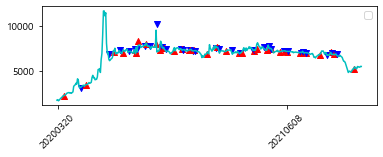

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from typing import Sized
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.cluster import KMeans
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

from sklearn.mixture import GaussianMixture

commission = 0.00015
tax = 0.0025
songtemp=0
initial_funds=1000000

sell_count = 0
buy_count = 0

class Data:
    def __init__(self):
        self.data=0
        self.close=0
        self.price=0

        # 볼린저밴드
        self.mbb=0
        self.ubb=0
        self.lbb=0
        self.bw=0
        self.mean_bw=0
        
        # RSI
        self.ursi=0         # U
        self.drsi=0         # D
        self.a_ursi=0       # AU
        self.a_drsi=0       # AD
        self.rs=0           # RS
        self.rsi=0          # RSI

        self.setData()


    def setData(self):
        self.data = pd.read_csv("D:\송승규\stg\클러스터링에쓸거\빅텍트레이닝.csv"
                                , header=None,
        names=['날짜', '시가', '고가', '저가', '종가', '거래량','Cluss'], encoding="CP949")
   
        self.data0=self.data[self.data['Cluss']==0]
        self.data1=self.data[self.data['Cluss']==1]
        self.data2=self.data[self.data['Cluss']==2]
        self.data3=self.data[self.data['Cluss']==3]

        self.data['날짜']=self.data['날짜'].astype(str)
        
        self.data = self.data.reset_index(drop=True)
        self.price=self.data['시가']
        self.close=self.data.loc[:, '종가'].astype(int)
        self.close.index=self.data.loc[:, '날짜']
        self.clus=self.data.loc[:,'Cluss']

        ##

        self.close0=self.data0.loc[:, '종가'].astype(int)
        self.close0.index=self.data0.loc[:, '날짜']
        self.close1=self.data1.loc[:, '종가'].astype(int)
        self.close1.index=self.data1.loc[:, '날짜']
        self.close2=self.data2.loc[:, '종가'].astype(int)
        self.close2.index=self.data2.loc[:, '날짜']
        self.close3=self.data3.loc[:, '종가'].astype(int)
        self.close3.index=self.data3.loc[:, '날짜']

        self.RSI()  


    def RSI(self, w=9):
        # 기본설정
        self.ursi=self.close.diff(1).dropna()

        self.drsi=self.close.diff(1).dropna()

        self.ursi[self.ursi<0]=0
        self.drsi[self.drsi>0]=0
        
        self.a_ursi=self.ursi.rolling(window=w).mean()
        self.a_drsi=abs(self.drsi.rolling(window=w).mean())

        self.rs=self.a_ursi/self.a_drsi
        self.rsi=100.0-(100.0/(1.0+self.rs))



class Trade(Data):
    def __init__(self, inital_funds):
        super().__init__()
        self.funds=inital_funds
        self.stock_amount=0
        self.stock_price=0
        self.tempa=0
        self.tempb=0
        self.correct=0
        self.note=""

    # 수수료 포함 buy
    def buyStocks(self, stocks_price):
        amount_buy=self.funds//stocks_price
        self.note=""

        if amount_buy<=0:
            return False
        commission_buy=stocks_price*amount_buy*commission
        if self.funds-stocks_price*amount_buy-commission_buy<0:
            while amount_buy>0:
                amount_buy-=1
                commission_buy=stocks_price*amount_buy*commission
                if self.funds-stocks_price*amount_buy-commission_buy>=0:
                    break
        self.stock_amount+=amount_buy
        self.tempa=self.funds
        self.funds=round(self.funds-(stocks_price*amount_buy+commission_buy))

        self.stock_price=stocks_price
        return True


    # 수수료 포함 sell
    def sellStocks(self, stocks_price):
        if self.stock_amount==0:
            return False
        commission_sell=(stocks_price*self.stock_amount)*(commission+tax)
        self.funds=round(self.funds+stocks_price*self.stock_amount-commission_sell)
        self.tempb=self.funds
        

        if self.tempb-self.tempa>0:
            self.correct+=1
            #self.note=self.tempb-self.tempa,"이득"
            self.note="\t이득"
        else:
            #self.note=self.tempb-self.tempa,"손해"
            self.note="\t손해"


        self.stock_price=stocks_price
        self.stock_amount=0
        return True
        

    def show(self, sort, date, color):
        songtemp=0
        print(f'{color}{sort} 날짜:{date} 시가:{self.stock_price}{color}')
        print(f'{color}자금:{self.funds}, 보유 주식:{self.stock_amount}\n{self.note}{color}')
        #print(f'{color}{self.note}{color}')
        #print()


    # 종가, rsi 그래프 그리기
    def draw(self, sort , num): 
        plt.style.use('seaborn-pastel')
        plt.subplot(2,1,1)
        
        df=self.close
        df0=self.close0
        df0.index=df0.index.astype(str)
        df1=self.close1
        df1.index=df1.index.astype(str)
        df2=self.close2
        df2.index=df2.index.astype(str)
        df3=self.close3
        df3.index=df3.index.astype(str)

            
        if sort=='매수':
            songtemp=0
            #plt.scatter(self.data.index[num], self.data['종가'].iloc[num], color="r", marker='^')
            plt.scatter(self.data.index[num+1], self.data['시가'].iloc[num+1], color="r", marker='^')
        
        elif sort=='매도':
            songtemp=0
            #plt.scatter(self.data.index[num], self.data['종가'].iloc[num], color="b", marker='v')
            plt.scatter(self.data.index[num+1], self.data['시가'].iloc[num+1], color="b", marker='v')



        else: 
            songtemp=0
            df2=self.close
            df2.index=df2.index.astype(str)
            plt.rc('font', family='Malgun Gothic')
            plt.plot(df2.index, df2, color="c")
            plt.xticks(np.arange(1, df.shape[0], 300), rotation=45)
            plt.legend()  
            plt.show()
            

sell_count = 0
buy_count = 0

print()

trade = Trade(initial_funds)


for num in range(0,trade.rsi.shape[0]):
        if num>0 and trade.rsi.iloc[num]>50 and trade.rsi.iloc[num]!=np.NaN:
            # rsi 값이 50상향 돌파 매수 시그널
            b=trade.buyStocks(trade.price[num+1])
            if b:
                trade.show('매수', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                buy_count+=1
                trade.draw('매수', num)
                
        if num>0 and trade.rsi.iloc[num]<50 and trade.rsi.iloc[num]!=np.NaN :
            # rsi 값이 50하향 돌파  매도 시그널
            b=trade.sellStocks(trade.price[num+1])
            if b:
                trade.show('매도', trade.data['날짜'][num+1], '\0')
                print("클러스터 : ",trade.data['Cluss'][num+1])
                print()
                sell_count += 1
                trade.draw('매도', num)

print(f'매도횟수:{sell_count}')
print(f'매수횟수:{sell_count}')
print(f'정확도: {sell_count} 중 {trade.correct} 번 수익 == > {(trade.correct/sell_count)*100}%')
print()
print(f'투자 금액={initial_funds}')
money=0
if trade.stock_amount!=0:
    money=trade.price.iloc[-1]*trade.stock_amount
#print(f'보유 주식 수:{trade.stock_amount}')
print(f'투자 후 금액={trade.funds+money}')
print(f'수익률={(trade.funds+money-initial_funds)/initial_funds*100}%')
#print(f'원숭이 금액={initial_funds-(initial_funds//trade.close.iloc[0])*trade.close.iloc[0]+trade.close.iloc[-1]*(initial_funds//trade.close.iloc[0])}')
monkeyukiki=initial_funds-(initial_funds//trade.close.iloc[0])*trade.close.iloc[0]+trade.close.iloc[-1]*(initial_funds//trade.close.iloc[0])
print(f'원숭이 수익률={(monkeyukiki-initial_funds)/initial_funds*100}%')
trade.draw(0, 0)
